In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [22]:
dataset = pd.read_csv("D:\\Datasets\\netflix\\netflix_titles.csv")

In [23]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [24]:
#First lets findout how many null values there in  each columns
dataset.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [25]:
def percent_missing(df):
    percent_nan =  df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

percent_nan = percent_missing(dataset)
print(percent_nan)

rating         0.160411
date_added     0.176452
country        7.635547
cast           9.143407
director      31.584857
dtype: float64


In [26]:
dataset.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [27]:
df = dataset.copy()

In [28]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [29]:
df.shape

(6234, 12)

In [30]:
df=df.dropna()
df.shape

(3774, 12)

In [12]:
df.duplicated().sum()


0

In [31]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

In [32]:
df.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,8,2017,9
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...",2017-09-08,2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",8,2017,9
19,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium",2017-09-08,2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...,8,2017,9
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,2017-09-08,2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...,8,2017,9
21,80046728,Movie,Moonwalkers,Antoine Bardou-Jacquet,"Ron Perlman, Rupert Grint, Robert Sheehan, Ste...","France, Belgium",2017-09-08,2015,R,96 min,"Action & Adventure, Comedies, International Mo...","A brain-addled war vet, a failing band manager...",8,2017,9
23,70304988,Movie,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",United States,2017-09-08,2014,PG-13,113 min,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f...",8,2017,9


### Data Visualization



Distribution of Movies and Tv Shows in Netflix

Text(0.5, 1.0, 'Type')

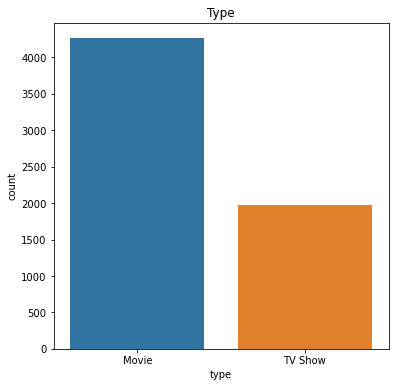

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(dataset['type'])
plt.title('Type')

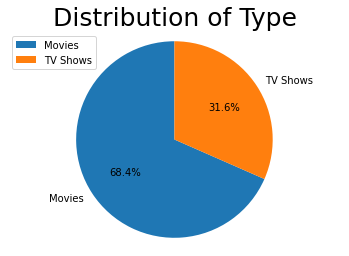

In [44]:
new = dataset["type"].value_counts()
labels = "Movies","TV Shows"
plt.pie(x= new,autopct='%1.1f%%',
shadow=False,startangle=90,labels=labels)
plt.axis('equal')
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()


Rating of shows and movies

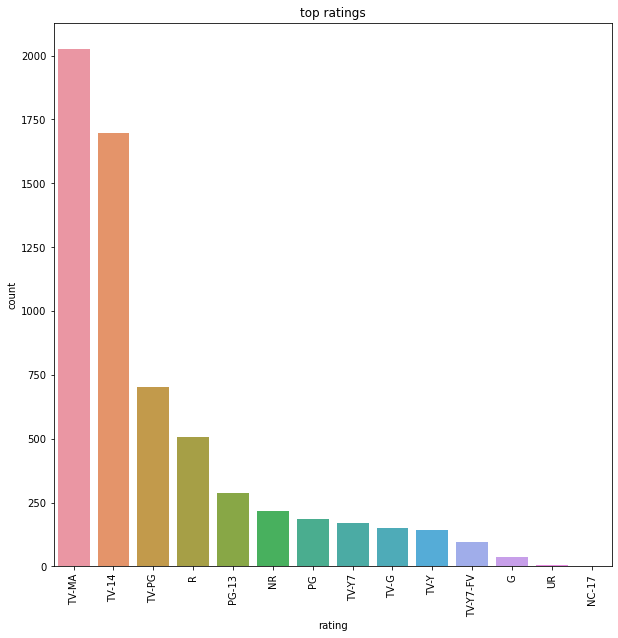

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(dataset['rating'],order=dataset['rating'].value_counts().index[0:15])
plt.title('top ratings')
plt.xticks(rotation=90);

Relation between Type and Rating

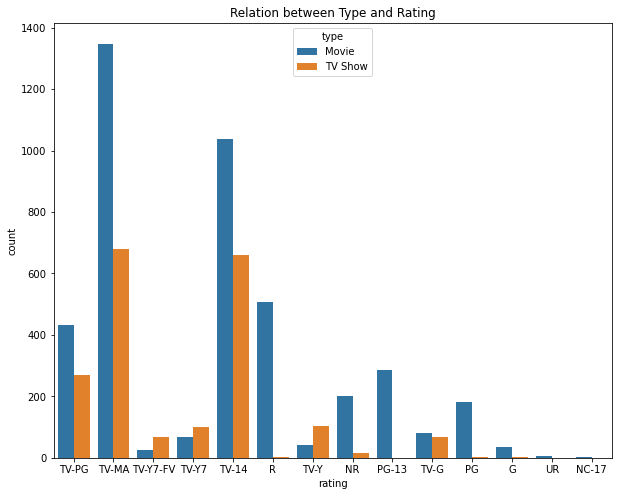

In [47]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=dataset)
plt.title('Relation between Type and Rating')
plt.show()

Total content across the year

In [59]:
data =dataset.copy()
data = data.dropna(subset=['date_added'])

data["date_added"] = pd.to_datetime(df['date_added'])


In [61]:
data['day_added'] = df['date_added'].dt.day
data['year_added'] = df['date_added'].dt.year
data['month_added']=df['date_added'].dt.month


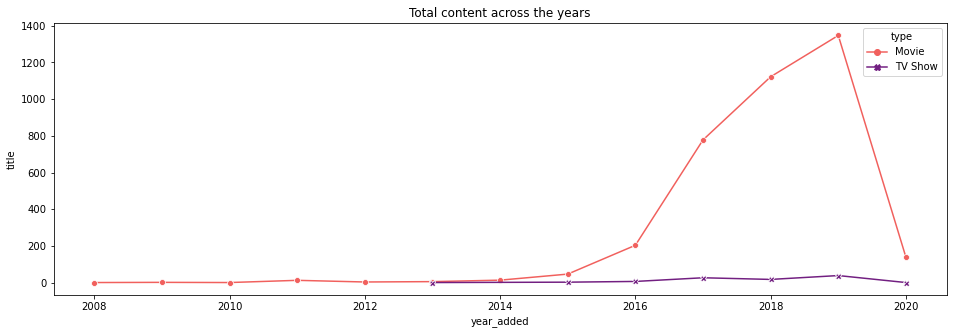

In [62]:
type_year = (data.groupby(['type','year_added'])['title'].size()).reset_index()
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = type_year,x = 'year_added',y = 'title',hue = 'type',style = 'type',palette='magma_r',markers=True, dashes=False)
plt.title("Total content across the years")
plt.show()

Yearly Wise Content in netflix


<Figure size 576x576 with 0 Axes>

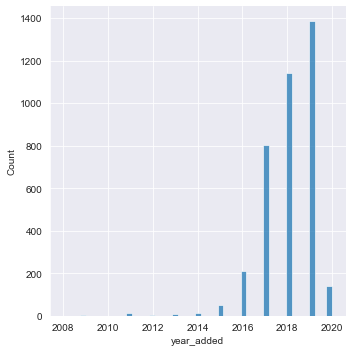

In [105]:
plt.figure(figsize=(8,8))
sns.displot(data = data,x = "year_added")
sns.set_style("darkgrid")

Country wise content in netflix

<AxesSubplot:>

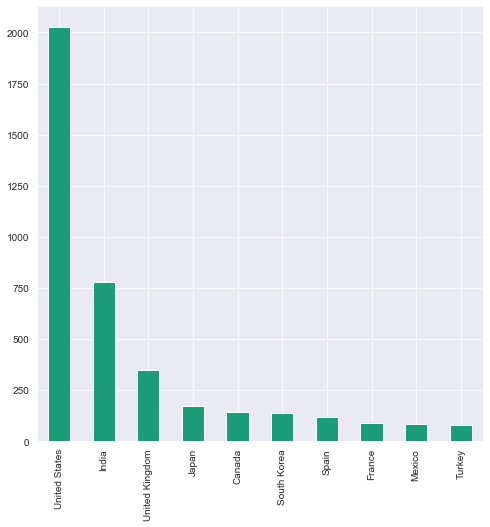

In [104]:
plt.figure(figsize=(8,8))
data["country"].value_counts()[:10].plot.bar(colormap='Dark2')

Top Genre of content present in netflix

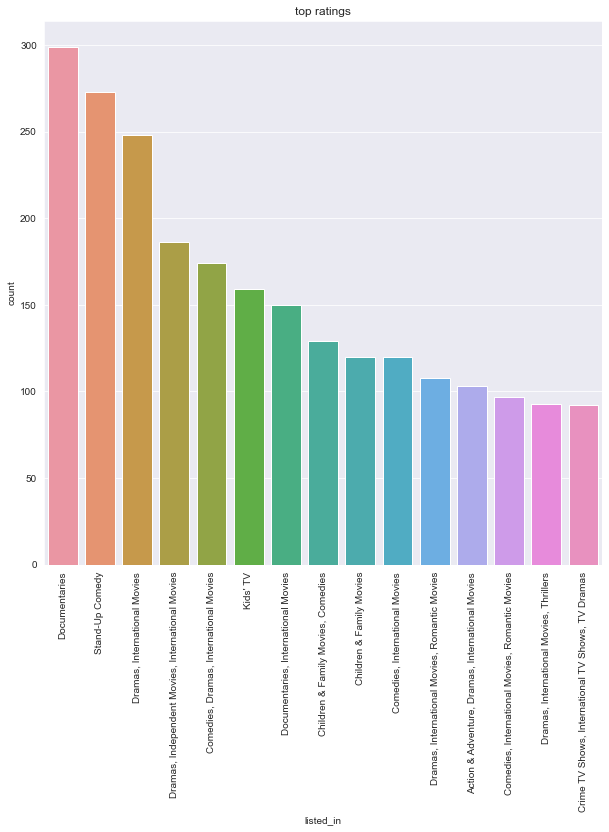

In [87]:
plt.figure(figsize=(10,10))
sns.countplot(dataset['listed_in'],order=dataset['listed_in'].value_counts().index[0:15])
plt.title('top ratings')
plt.xticks(rotation=90);

Month-wise added content over the years

<AxesSubplot:xlabel='month_added', ylabel='count'>

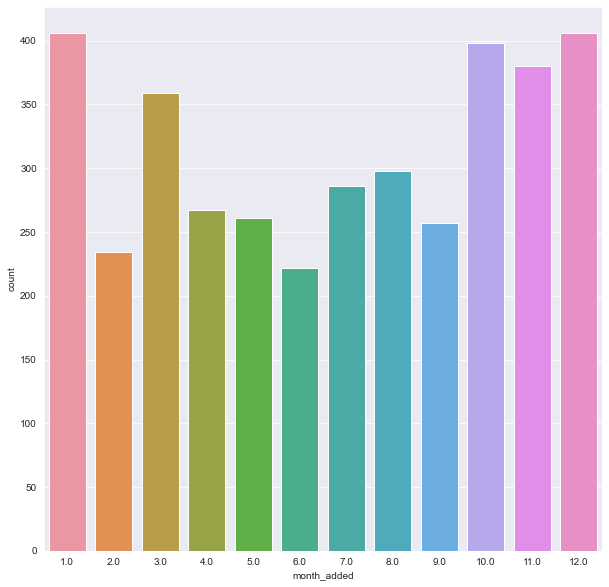

In [101]:
plt.figure(figsize=(10,10))
sns.countplot(data = data,x = "month_added")

Cast in netflix

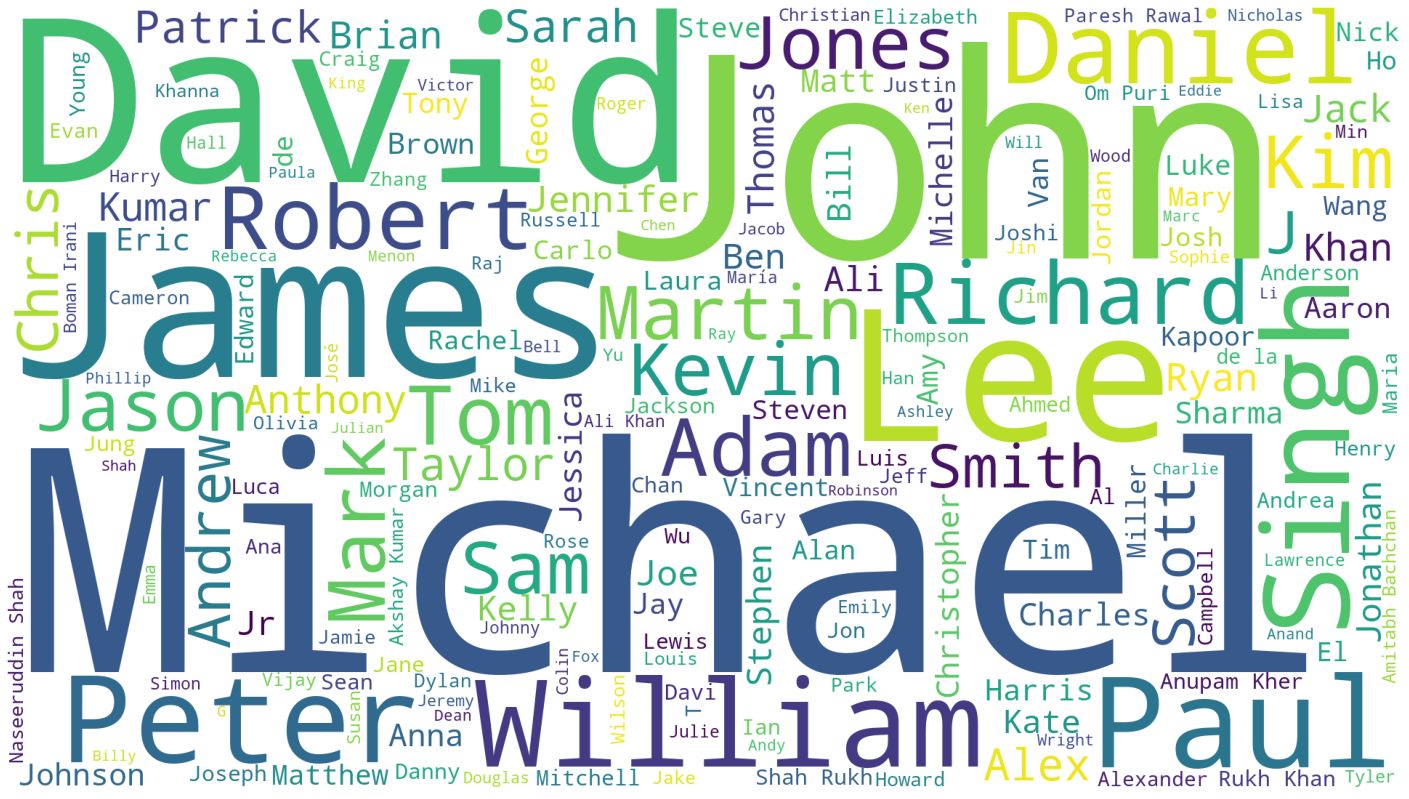

In [92]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()


Directors in netflix

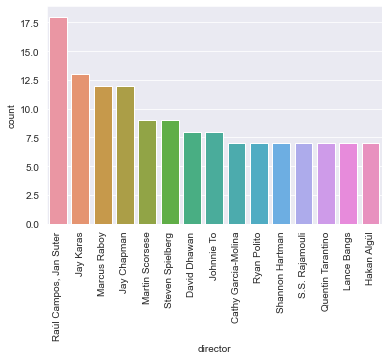

In [98]:
sns.countplot(df['director'],order=df['director'].value_counts().index[0:15])
plt.xticks(rotation=90);

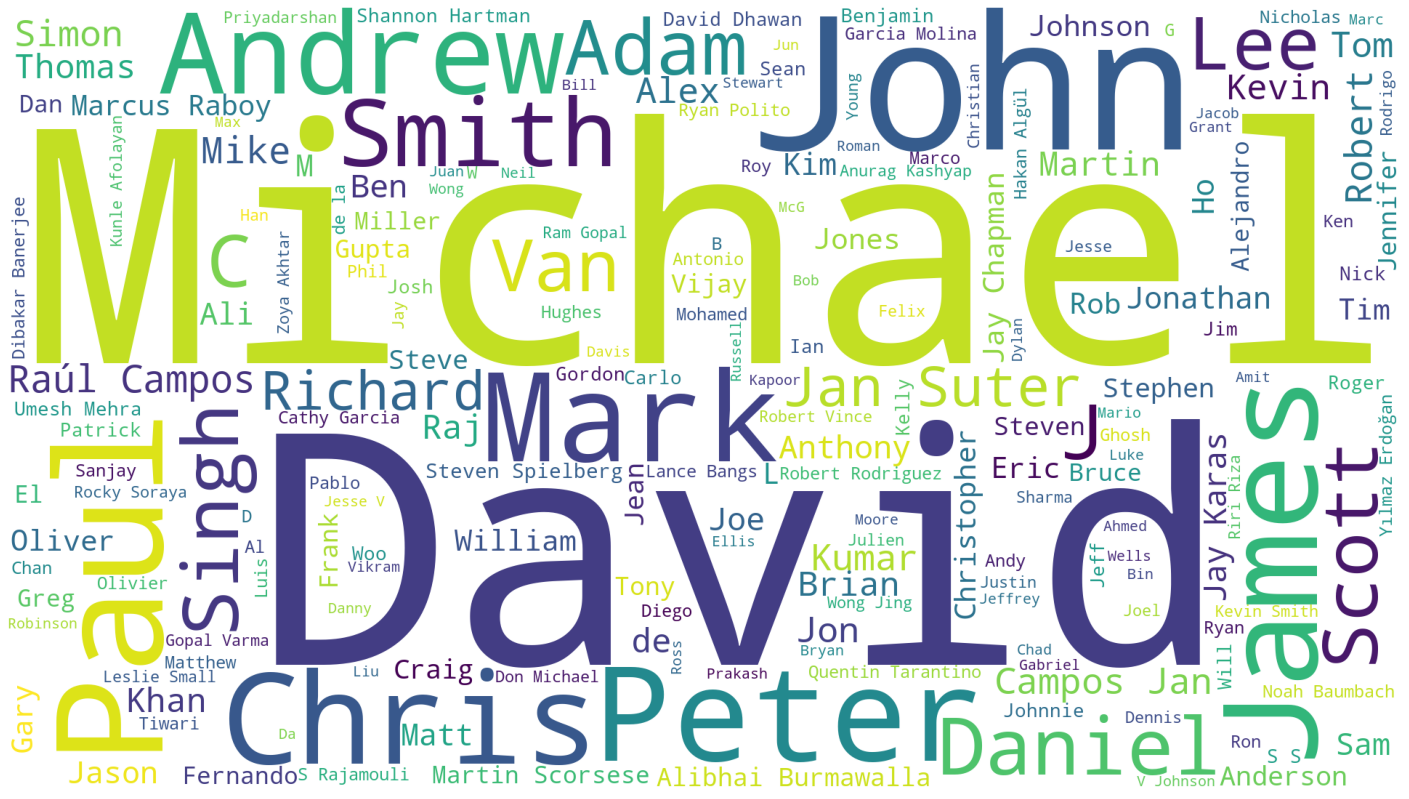

In [99]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

Total content release per year

<AxesSubplot:xlabel='count', ylabel='release_year'>

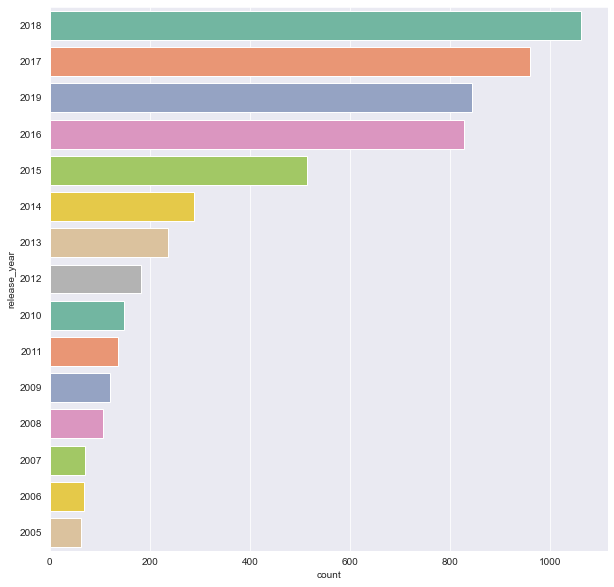

In [102]:
plt.figure(figsize=(10,10))
sns.countplot(data = data,y = "release_year",palette="Set2", order=data['release_year'].value_counts().index[0:15])
